In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [3]:
#Reading the dataset
car_sales_df = pd.read_csv('Resources/car_combined_test_train.csv')
car_sales_df

,Index,Resale-Cat,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,0,Low,Gasoline,large car,3.0,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,1,Low,Gasoline,large car,3.0,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,2,Low,Gasoline,large car,4.4,8,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,3,Low,Gasoline,large car,4.4,8,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,4,Low,Gasoline,large car,4.4,8,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
5,6,High,Gasoline,pickup,2.5,4,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
6,7,High,Gasoline,pickup,2.5,4,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
7,8,High,Gasoline,pickup,2.5,4,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848
8,9,High,Gasoline,pickup,2.5,4,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848
9,10,High,Gasoline,pickup,2.5,4,Man-6,2WD,6,19.0,26.0,22.0,5,No,406.0,103217,106583,20848


In [4]:
car_sales = car_sales_df.copy()

car_sales_clean = car_sales.copy()
car_sales_clean = car_sales_clean.drop(['Index','displ','cyl'], axis=1)
 

car_sales_clean.head()

,Resale-Cat,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,Low,Gasoline,large car,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,Low,Gasoline,large car,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,Low,Gasoline,large car,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,Low,Gasoline,large car,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,Low,Gasoline,large car,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909


In [5]:
car_sales_sliced = car_sales_clean.copy()
bins = (3,23,50,114)
group_names = ['low-mpg','medium-mpg','high-mpg']
car_sales_sliced['cmb_mpg'] = pd.cut(car_sales_sliced['cmb_mpg'],bins = bins,labels = group_names)


In [6]:
car_sales_sliced['cmb_mpg'].unique()

[medium-mpg, low-mpg, high-mpg]
Categories (3, object): [low-mpg < medium-mpg < high-mpg]

In [7]:
lb = LabelEncoder()
car_sales_encoded = car_sales_sliced.copy()
car_sales_encoded['cmb_mpg']= lb.fit_transform(car_sales_encoded['cmb_mpg'])
car_sales_encoded['Resale-Cat']= lb.fit_transform(car_sales_encoded['Resale-Cat'])    
car_sales_encoded['fuel_type']= lb.fit_transform(car_sales_encoded['fuel_type'])
car_sales_encoded['vehicle_class']= lb.fit_transform(car_sales_encoded['vehicle_class'])
car_sales_encoded['trans']= lb.fit_transform(car_sales_encoded['trans'])
car_sales_encoded['drive']= lb.fit_transform(car_sales_encoded['drive'])
car_sales_encoded['smartway']= lb.fit_transform(car_sales_encoded['smartway'])

car_sales_encoded.head()

,Resale-Cat,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,1,3,0,9,0,6,21.0,29.0,2,5,1,371.0,12071,8731,7909
1,1,3,0,9,0,6,21.0,29.0,2,5,1,371.0,12071,8731,7909
2,1,3,0,9,0,5,17.0,25.0,1,4,1,436.0,12071,8731,7909
3,1,3,0,9,0,6,17.0,25.0,1,4,1,436.0,12071,8731,7909
4,1,3,0,9,1,5,16.0,25.0,1,4,1,459.0,12071,8731,7909


In [35]:
car_sales_encoded.to_csv("Resources/car_sales_encoded.csv", index=False)

In [8]:
car_sales_encoded['cmb_mpg'].value_counts()

1    410
2     78
0     17
Name: cmb_mpg, dtype: int64

In [9]:
# Sepearate dataset
car_sales_ml = car_sales_encoded.copy()
X = car_sales_ml.drop('cmb_mpg', axis=1)
y = car_sales_ml['cmb_mpg']

In [10]:
# Train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [11]:
# Encode the dependent variable
encoder = LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [12]:
#Define the encoder function
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels] = 1
    return one_hot_encode

In [13]:
y = encoder.transform(y)
Y = one_hot_encode(y)


In [14]:
#Shuffle the dataset to mix up the rows
X,Y = shuffle(X,Y,random_state=1)

In [15]:
# Convert the dataset into train and test part
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=415, test_size=0.20)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(404, 14)
(404, 3)
(101, 14)


In [17]:
# Apply Standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train[:10]

array([[-0.55065943,  0.37905971, -0.33142423, -0.39086192,  1.07723155,
        -1.60054072, -0.33068678, -0.43347932, -0.70272498, -0.06480648,
         0.75394279,  2.03445141,  2.04035436,  0.38193097],
       [ 1.8160045 ,  0.37905971,  1.0418618 ,  0.37754789, -0.92830553,
        -1.60054072,  0.41679201,  0.54973527,  1.81524301,  3.67545329,
        -1.46615716, -0.90738275, -0.90974708, -0.80653611],
       [-0.55065943,  0.37905971, -0.33142423, -0.39086192, -0.92830553,
         0.38498165, -0.33068678, -0.35784743, -0.70272498, -0.06480648,
         0.80220583,  2.03445141,  2.04035436,  0.38193097],
       [-0.55065943,  0.37905971, -0.33142423, -0.39086192, -0.92830553,
         0.38498165, -0.27318841, -0.28221554, -0.70272498, -0.06480648,
         0.51262758,  0.17853357,  0.14550147, -0.47175144],
       [-0.55065943,  0.37905971,  0.35521879, -0.39086192,  1.07723155,
        -0.27685914, -0.15819168, -0.20658364, -0.07323298, -0.06480648,
        -0.00861328,  0.03

In [19]:
# Define the important parameters and variable 
#to work with the tensors

learning_rate = 0.3
training_epochs = 400
cost_history = np.empty(shape=[1],dtype=float)
n_dim = X.shape[1]
print('n_dim',n_dim)

n_dim 14


In [20]:
n_class = 3
model_path = "Model/NMI"

#Define the number of hidden layers and number of neurons for each layer 
n_hidden_1 = 11
n_hidden_2 = 11
n_hidden_3 = 11
n_hidden_4 = 11

x = tf.placeholder(tf.float32,[None,n_dim])
w = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32,[None, n_class])

In [21]:
#Define the model
def multilayer_perceptron(x,weights,biases):
    #Hidden layer with RELU activationsed
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    #Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    #Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)   
    
    #Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    #Output layer with linear activation
    output_layer = tf.matmul(layer_4,weights['out']+biases['out'])
    
    return output_layer
    

In [22]:
#Define the weights and the biases for each layer
weights = {
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}
biases = {
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
}

In [23]:
#Initialized all the variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [24]:
#Call your model defined
y = multilayer_perceptron(x,weights,biases)

In [25]:
# Define the cost function and optimizer
cost_function = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(
    learning_rate).minimize(cost_function)

W0308 22:46:35.685222 140735975158656 deprecation.py:323] From <ipython-input-25-6fcdfce56050>:4: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [26]:
sess = tf.Session()
sess.run(init)



In [27]:
# Calculate the cost and accuracy for each epoch
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: X_train, y_: y_train})
    cost = sess.run(cost_function, 
                    feed_dict={x: X_train, y_: y_train})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), 
                                  tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                      tf.float32))
   # print("Accuracy: ",(sess.run(accuracy,
#                              feed_dict={x: x_test,y_test})))
    pred_y = sess.run(y,feed_dict={x:X_test})
    mse = tf.reduce_mean(tf.square(pred_y-y_test))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy,feed_dict={x: X_train, y_: y_train}))
    accuracy_history.append(accuracy)
    
    print('epoch: ',epoch,' - ','cost: ',cost, ' - MSE: ',mse_,
          ' - Train Accuracy: ',accuracy)

epoch:  0  -  cost:  4.3604803  - MSE:  266.3751760573218  - Train Accuracy:  0.8193069
epoch:  1  -  cost:  0.7421101  - MSE:  9.485462260563082  - Train Accuracy:  0.8193069
epoch:  2  -  cost:  0.89630985  - MSE:  0.43637823039728924  - Train Accuracy:  0.61633664
epoch:  3  -  cost:  1.5490981  - MSE:  53.84611387491935  - Train Accuracy:  0.8193069
epoch:  4  -  cost:  0.8772697  - MSE:  0.43676198470520594  - Train Accuracy:  0.48514852
epoch:  5  -  cost:  0.72919756  - MSE:  15.790439650993822  - Train Accuracy:  0.8193069
epoch:  6  -  cost:  0.5902132  - MSE:  1.2453227297118084  - Train Accuracy:  0.76237625
epoch:  7  -  cost:  0.81072104  - MSE:  22.049043669040454  - Train Accuracy:  0.8193069
epoch:  8  -  cost:  0.4229777  - MSE:  2.846748132756141  - Train Accuracy:  0.83168316
epoch:  9  -  cost:  0.54152644  - MSE:  14.37425272865649  - Train Accuracy:  0.8193069
epoch:  10  -  cost:  0.45603997  - MSE:  2.4480038257543577  - Train Accuracy:  0.8193069
epoch:  11  - 

epoch:  90  -  cost:  0.22044198  - MSE:  24.536569799043615  - Train Accuracy:  0.84653467
epoch:  91  -  cost:  0.22050461  - MSE:  24.62369600125171  - Train Accuracy:  0.84653467
epoch:  92  -  cost:  0.2200662  - MSE:  25.02704368227612  - Train Accuracy:  0.84653467
epoch:  93  -  cost:  0.22014885  - MSE:  24.949918483123593  - Train Accuracy:  0.84653467
epoch:  94  -  cost:  0.21977933  - MSE:  25.1447877811191  - Train Accuracy:  0.84653467
epoch:  95  -  cost:  0.21981572  - MSE:  25.317248068148874  - Train Accuracy:  0.84653467
epoch:  96  -  cost:  0.21953757  - MSE:  25.10956916421755  - Train Accuracy:  0.84653467
epoch:  97  -  cost:  0.21944004  - MSE:  25.40108583834384  - Train Accuracy:  0.84653467
epoch:  98  -  cost:  0.21911179  - MSE:  25.699428655522244  - Train Accuracy:  0.84653467
epoch:  99  -  cost:  0.21915622  - MSE:  25.812016999575008  - Train Accuracy:  0.84653467
epoch:  100  -  cost:  0.21895692  - MSE:  25.650484892828203  - Train Accuracy:  0.846

epoch:  180  -  cost:  0.21058445  - MSE:  33.91542228963601  - Train Accuracy:  0.84653467
epoch:  181  -  cost:  0.21049699  - MSE:  34.246152719494795  - Train Accuracy:  0.84653467
epoch:  182  -  cost:  0.2104202  - MSE:  34.272240469557  - Train Accuracy:  0.84653467
epoch:  183  -  cost:  0.21033664  - MSE:  34.3194614967305  - Train Accuracy:  0.84653467
epoch:  184  -  cost:  0.21025671  - MSE:  34.25170485015144  - Train Accuracy:  0.84653467
epoch:  185  -  cost:  0.21021555  - MSE:  34.67400584201903  - Train Accuracy:  0.84653467
epoch:  186  -  cost:  0.21019973  - MSE:  34.59987621570703  - Train Accuracy:  0.84653467
epoch:  187  -  cost:  0.21004283  - MSE:  34.541949694477545  - Train Accuracy:  0.84653467
epoch:  188  -  cost:  0.21007477  - MSE:  34.702758552596954  - Train Accuracy:  0.84653467
epoch:  189  -  cost:  0.20992652  - MSE:  34.940581518305116  - Train Accuracy:  0.84653467
epoch:  190  -  cost:  0.20989795  - MSE:  35.00085643617279  - Train Accuracy: 

epoch:  269  -  cost:  0.20528261  - MSE:  41.30194065700026  - Train Accuracy:  0.84653467
epoch:  270  -  cost:  0.20522006  - MSE:  41.17590152875824  - Train Accuracy:  0.84653467
epoch:  271  -  cost:  0.20517859  - MSE:  41.146359747609594  - Train Accuracy:  0.84653467
epoch:  272  -  cost:  0.20514995  - MSE:  41.544634891475205  - Train Accuracy:  0.84653467
epoch:  273  -  cost:  0.20508938  - MSE:  41.41277816336764  - Train Accuracy:  0.84653467
epoch:  274  -  cost:  0.20505118  - MSE:  41.3806464131814  - Train Accuracy:  0.84653467
epoch:  275  -  cost:  0.20502192  - MSE:  41.77545223580383  - Train Accuracy:  0.84653467
epoch:  276  -  cost:  0.20497744  - MSE:  41.61921817556878  - Train Accuracy:  0.84653467
epoch:  277  -  cost:  0.20493071  - MSE:  41.54053141025417  - Train Accuracy:  0.84653467
epoch:  278  -  cost:  0.20490225  - MSE:  42.004562477562025  - Train Accuracy:  0.84653467
epoch:  279  -  cost:  0.20484954  - MSE:  41.84334781018797  - Train Accuracy

epoch:  359  -  cost:  0.20243749  - MSE:  47.68888199028525  - Train Accuracy:  0.84653467
epoch:  360  -  cost:  0.20242423  - MSE:  47.647264848046  - Train Accuracy:  0.84653467
epoch:  361  -  cost:  0.20241277  - MSE:  48.0561772013535  - Train Accuracy:  0.84653467
epoch:  362  -  cost:  0.20237534  - MSE:  47.86652081593671  - Train Accuracy:  0.84653467
epoch:  363  -  cost:  0.20236965  - MSE:  48.22614931081509  - Train Accuracy:  0.84653467
epoch:  364  -  cost:  0.20233713  - MSE:  48.03663502908542  - Train Accuracy:  0.84653467
epoch:  365  -  cost:  0.20232089  - MSE:  47.987030003042115  - Train Accuracy:  0.84653467
epoch:  366  -  cost:  0.20230865  - MSE:  48.392438657223174  - Train Accuracy:  0.84653467
epoch:  367  -  cost:  0.20227498  - MSE:  48.20137163621511  - Train Accuracy:  0.84653467
epoch:  368  -  cost:  0.20226762  - MSE:  48.555696469112554  - Train Accuracy:  0.84653467
epoch:  369  -  cost:  0.20223686  - MSE:  48.365007974443245  - Train Accuracy:

In [28]:
save_path = saver.save(sess,model_path)
print('Model saved in file: %s' % save_path)

Model saved in file: Model/NMI


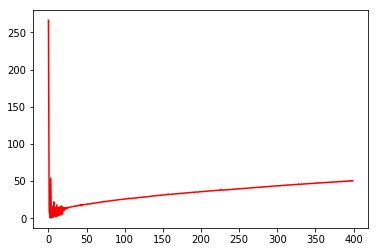

In [29]:
#plot mse
plt.plot(mse_history,'r')
plt.show()

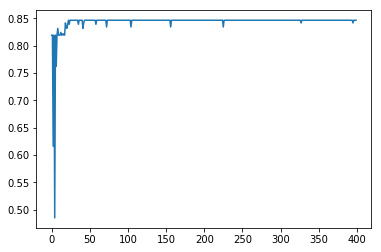

In [30]:
#Plot accuracy graph
plt.plot(accuracy_history)
plt.show()

In [31]:
# Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(
    tf.cast(correct_prediction, tf.float32))
print('Test Accuracy: ',
      (sess.run(accuracy, feed_dict ={x: X_test, y_: y_test})))
print(correct_prediction)
print(accuracy)


Test Accuracy:  0.84158415
Tensor("Equal_400:0", shape=(?,), dtype=bool)
Tensor("Mean_801:0", shape=(), dtype=float32)


In [32]:
#Print the final mean square error
pred_y = sess.run(y,feed_dict={x:X_test} )
mse = tf.reduce_mean(tf.square(pred_y-y_test))
print("MSE: %.4f" % sess.run(mse))

MSE: 50.2134
